### Imports

In [3]:
import sys
sys.path.append("/Users/dorisv/Documents/imaging_behavior")
sys.path.append("C:\Users\dorisv\Desktop\Shawn's data")

try:
    import aibs
except:
    import aibs
    
from aibs.dev.shawndev import FileTools
from aibs.dev.shawndev.BehaviorEvents import BehaviorEvents
from aibs.Analysis.InDevelopment import ForageSession
from aibs.dev.shawndev import Forage, Psychometrics, ForageTools, FileTools
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html',True)
%matplotlib inline
import matplotlib
import os

import imaging_behavior as im
import imaging_behavior.plotting.plotting_functions as pf
import imaging_behavior.plotting.utilities as pu
from aibs.Analysis.Core import smooth

from scipy.optimize import minimize
from scipy.optimize import basinhopping
import math
from math import log
from numpy import linalg as LA

In [4]:
import sys
sys.path.append("/Users/dorisvoina/local/python")

In [5]:
df1 = pd.DataFrame(np.random.rand(10,4),columns=list('ABCD'))
print df1
df2 = df1.ix[4:8]
print df2
df2.reset_index(drop=True,inplace=True)
df2.loc[-1] = [2, 3, 4, 5]
print df2
df2.loc[-2] = [14, 15, 16, 17]
print df2
df2.reset_index(drop=True,inplace=True)
print df2
df2 = df2[['A', 'B', 'C']] # df2 has only columns A B C

          A         B         C         D
0  0.027585  0.770635  0.605502  0.722302
1  0.116361  0.107851  0.188023  0.594514
2  0.042666  0.781970  0.435317  0.428026
3  0.120550  0.617510  0.252303  0.715037
4  0.133320  0.610191  0.398873  0.121420
5  0.352708  0.230773  0.723220  0.856137
6  0.246128  0.346134  0.882593  0.192367
7  0.608499  0.215411  0.483925  0.729091
8  0.562166  0.062866  0.942931  0.851689
9  0.234354  0.327393  0.056525  0.714728
          A         B         C         D
4  0.133320  0.610191  0.398873  0.121420
5  0.352708  0.230773  0.723220  0.856137
6  0.246128  0.346134  0.882593  0.192367
7  0.608499  0.215411  0.483925  0.729091
8  0.562166  0.062866  0.942931  0.851689
           A         B         C         D
 0  0.133320  0.610191  0.398873  0.121420
 1  0.352708  0.230773  0.723220  0.856137
 2  0.246128  0.346134  0.882593  0.192367
 3  0.608499  0.215411  0.483925  0.729091
 4  0.562166  0.062866  0.942931  0.851689
-1  2.000000  3.000000  4.00

### List all behavioral log files for Bird/Mushroom task

In [6]:
file_dir = r"C:\Users\dorisv\Desktop\Shawn's data" # User specific path
file_names = FileTools.get_onlyfiles(file_dir,'.pkl')
print file_names
file_paths = [os.path.join(file_dir,x) for x in file_names]
print len(file_paths)

['141002154729-141002141708-M130587.pkl', '141003144950-141003132939-M130587.pkl', '141006145523-141006132648-M130587.pkl', '141007134818-141007123247-M130587.pkl', '141008151458-141008140639-M130587.pkl', '141009145909-141009140029-M143454.pkl', '141009150650-141009135709-M130587.pkl', '141010142129-141010125614-M138687.pkl', '141010142331-141010125314-M130587.pkl', '141010142834-141010125757-M143454.pkl', '141013141604-141013130033-M138687.pkl', '141013142412-141013130144-M143454.pkl', '141013142818-141013125757-M130587.pkl', '141014145417-141014134634-M130587.pkl', '141014145717-141014134946-M143454.pkl', '141014151423-141014134852-M138687.pkl', '141015151445-141015135551-M138687.pkl', '141015154511-141015140333-M143454.pkl', '141016144616-141016133607-M130587.pkl', '141016144841-141016133904-M138687.pkl', '141016145602-141016134028-M143454.pkl', '141020142411-141020131951-M130587.pkl', '141020142704-141020132428-M143454.pkl', '141020143954-141020132251-M138687.pkl', '141021143015-1

In [6]:
df_list = [pd.load(f) for f in file_paths]

In [10]:
for file_number in range(0, len(file_paths)):
    #d = pd.read_pickle(file_paths[file_number])
    session = im.load_session_from_behavioral_log_file(file_paths[file_number])

### Raw log file

In [11]:
d_list = [pd.read_pickle(file_paths[i]) for i in range(0, len(file_paths))]

In [12]:
d = pd.read_pickle(file_paths[5]) # Load an example log file
print d["vsyncintervals"]
print len(d["vsyncintervals"])

df = Forage.pkl2df(file_paths[5]);
df.head()
df_list = [Forage.pkl2df(file_paths[i]) for i in range(0, len(file_paths))]

[ 16.63725363  16.6860894   16.64867485 ...,  16.66285301  16.66048996
  16.66718523]
209048
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141009145909-141009140029-M143454.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141002154729-141002141708-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141003144950-141003132939-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141006145523-141006132648-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141007134818-141007123247-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141008151458-141008140639-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141009145909-141009140029-M143454.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141009150650-141009135709-M130587.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141010142129-141010125614-M138687.pkl
Loading pkl file: C:\Users\dorisv\Desktop\Shawn's data\141010142331-14

### Session object from 'imaging_behavior'

In [13]:
session = im.load_session_from_behavioral_log_file(file_paths[5])
print session

M143454 2014-10-09


In [14]:
dataFrame_list = [im.load_session_from_behavioral_log_file(file_paths[i]).df for i in range(0, len(file_paths))]

/Users/dorisv/Documents/imaging_behavior\imaging_behavior\core\epoch.py:145: UserWarning: Number of rewards greater than one
  warnings.warn('Number of rewards greater than one')


In [15]:
for j in range(0, len(dataFrame_list)):
        dataFrame_list[j].Image[dataFrame_list[j].Image == "CoxImage1.png"] = "mushroom"
        dataFrame_list[j].Image[dataFrame_list[j].Image == "CoxImage2.png"] = "bird"
        
dataFrame_list[1]

,Image,Ori,PosY,Size,abs_reward_rate,average_speed,duration,end_frame,end_time,first_lick_latency_0,...,lick_times_1,mouse_id,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time
0,bird,-15,0,550,1.408580,54.905943,1.742769,104,1.742769,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,0,0.000000,2014-10-03 14:49:45.315000
1,bird,0,0,400,1.408580,74.060865,1.182906,175,2.925675,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,105,1.742769,2014-10-03 14:49:45.315000
2,bird,-15,0,550,1.373647,75.229013,1.250163,250,4.175839,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,176,2.925675,2014-10-03 14:49:45.315000
3,bird,0,0,350,1.317835,45.388544,3.349858,451,7.525696,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,251,4.175839,2014-10-03 14:49:45.315000
4,bird,45,0,550,1.261059,25.822834,5.015883,752,12.541580,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,452,7.525696,2014-10-03 14:49:45.315000
5,bird,0,0,450,1.214683,84.197297,1.483320,841,14.024900,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,753,12.541580,2014-10-03 14:49:45.315000
6,bird,45,0,550,1.167418,70.252978,2.033290,963,16.058190,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,842,14.024900,2014-10-03 14:49:45.315000
7,bird,-15,0,600,1.084758,63.358064,2.100066,1089,18.158257,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,964,16.058190,2014-10-03 14:49:45.315000
8,bird,45,0,400,1.052723,36.910872,4.915870,1384,23.074127,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1090,18.158257,2014-10-03 14:49:45.315000
9,bird,-15,0,400,1.015602,51.740277,2.800250,1552,25.874377,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1385,23.074127,2014-10-03 14:49:45.315000


In [16]:
print df_list[0].columns
print dataFrame_list[0].columns

Index([u'Size', u'Image', u'Ori', u'PosY', u'trial', u'time', u'terraincode', u'pausetime', u'choice', u'selectiontime', u'istarget', u'speed', u'lapdistance', u'timebeforezone', u'slowing_f', u'mouse', u'date'], dtype='object')
Index([u'Image', u'Ori', u'PosY', u'Size', u'abs_reward_rate', u'average_speed', u'duration', u'end_frame', u'end_time', u'first_lick_latency_0', u'first_lick_latency_1', u'image', u'jcam_end_ind_exclusive', u'jcam_start_ind', u'lap_number', u'lick_duration_0', u'lick_duration_1', u'lick_times_0', u'lick_times_1', u'mouse_id', u'number_of_licks_0', u'number_of_licks_1', u'number_of_rewards', u'reward_times', u'start_date_time', u'start_frame', u'start_time', u'stop_date_time'], dtype='object')


In [17]:
for j in range(0, len(df_list)):
    df_list[j].Image[df_list[j].Image == "CoxImage1.png"] = "mushroom"
    df_list[j].Image[df_list[j].Image == "CoxImage2.png"] = "bird"
    
print len(df_list[1])
df_list[1]

1289


,Size,Image,Ori,PosY,trial,time,terraincode,pausetime,choice,selectiontime,istarget,speed,lapdistance,timebeforezone,slowing_f,mouse,date
0,400,bird,0,0,1,1.840244,53,0.267095,False,1,False,2152.301946,3937,0.099917,1.151120,M130587,2014-10-03 13:29:50.625000
1,550,bird,-15,0,2,3.024151,36,0.268031,False,1,False,2155.681332,2455,0.100434,0.995480,M130587,2014-10-03 13:29:50.625000
2,350,bird,0,0,3,4.273621,54,0.399960,False,1,False,1231.647159,2661,0.115117,1.148952,M130587,2014-10-03 13:29:50.625000
3,550,bird,45,0,4,7.623390,92,0.667990,False,1,False,1416.589407,4376,0.200129,11.667522,M130587,2014-10-03 13:29:50.625000
4,450,bird,0,0,5,12.638539,52,0.232075,False,1,False,2709.459253,3349,0.115528,0.995757,M130587,2014-10-03 13:29:50.625000
5,550,bird,45,0,6,14.122473,92,0.249965,False,1,False,1959.213561,3544,0.083261,1.200958,M130587,2014-10-03 13:29:50.625000
6,600,bird,-15,0,7,16.155746,35,0.314834,False,1,False,1996.971224,4097,0.150395,0.997373,M130587,2014-10-03 13:29:50.625000
7,400,bird,45,0,8,18.256180,95,0.832834,False,1,False,1103.000564,3796,0.132865,1.263148,M130587,2014-10-03 13:29:50.625000
8,400,bird,-15,0,9,23.172326,39,0.384844,False,1,False,1537.117166,5221,0.150351,0.998283,M130587,2014-10-03 13:29:50.625000
9,400,mushroom,15,0,10,25.971682,60,2.282713,True,1,True,1009.442921,4172,0.165107,1.319022,M130587,2014-10-03 13:29:50.625000


In [51]:
a = np.array([True, True, False])
b = np.logical_not(a)
print b

vector = dataFrame_list[j].choice.values
print type(vector)
print vector
print np.isnan(vector)

[False False  True]
<type 'numpy.ndarray'>
[True False True True False False True True False False True True False
 True True False True True True True False True True True False True True
 True False True True True False True False False True False True False
 False False True False True False False True False False True True True
 False True False False False True False True False True False False False
 True True True False True False False True False False True True False
 False False True True True False False True True True True False True True
 True True False True True True False True True True True False True True
 True False True False True True True True True True True True True False
 False False True True False True True True True True True True False True
 False False True True False True False False True True True False False
 True True True True False True False False False False False False False
 False True True False True False True True True True False True False
 F

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [49]:
a = np.array([np.NaN, True, 3])
np.isnan(a)

array([ True, False, False], dtype=bool)

In [31]:
noGood_ones = 0
good_ones = []

#for j in range(0, len(dataFrame_list)):
for j in range(0, len(dataFrame_list)):

    dataFrame = dataFrame_list[j]
    df = df_list[j]
    dataFrame = dataFrame[dataFrame.index != 0] #remove first trial that does not appear in the df data frame
    #print len(dataFrame), len(df_list[j])
    dataFrame["choice"] = df_list[j].choice
    dataFrame["total_trial_ind"] = range(0, len(dataFrame))
    print dataFrame["choice"]
    dataFrame_list[j] = dataFrame
    print dataFrame_list[j].choice
    #dataFrame.head()
    
    if len(df_list[j]) == len(dataFrame_list[j]):
        sum2 = 0
        for k in range(0, len(dataFrame_list[j])):
            #print df_list[j].Image.iloc[k], dataFrame_list[j].Image.iloc[k], df_list[j].Size.iloc[k], dataFrame_list[j].Size.iloc[k], df_list[j].Ori.iloc[k], dataFrame_list[j].Ori.iloc[k]
            if (df_list[j].Image.iloc[k] == dataFrame_list[j].Image.iloc[k]) and (df_list[j].Size.iloc[k] == dataFrame_list[j].Size.iloc[k]) and (df_list[j].Ori.iloc[k] == dataFrame_list[j].Ori.iloc[k]):
                sum2 = sum2+1  
                
        #print "this is ittt", sum2
        if sum2 == len(dataFrame_list[j]):
            #print j
            noGood_ones = noGood_ones+1
            good_ones.append(j)
            
        for k in range(0, len(dataFrame_list[j])):
            
            dataFrame = dataFrame[np.isnan(dataFrame_list[j].choice)]
                
print noGood_ones, len(dataFrame_list)
print good_ones

1     False
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13     True
...
1475    False
1476    False
1477     True
1478     True
1479    False
1480    False
1481     True
1482     True
1483     True
1484     True
1485     True
1486      NaN
1487      NaN
Name: choice, Length: 1487, dtype: object
1     False
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13     True
...
1475    False
1476    False
1477     True
1478     True
1479    False
1480    False
1481     True
1482     True
1483     True
1484     True
1485     True
1486      NaN
1487      NaN
Name: choice, Length: 1487, dtype: object
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13    False
...
1277    False
1278    False
1279    False
1280    False
1281    False
12

In [25]:
for j in good_ones:
    
    print len(dataFrame_list[j]), len(df_list[j])
    np.transpose(dataFrame_list.choice[j])

         Image  Ori  PosY  Size  abs_reward_rate  average_speed  duration  end_frame     end_time  first_lick_latency_0          ...          number_of_licks_0 number_of_licks_1 number_of_rewards  \
1         bird    0     0   400         1.408580      74.060865  1.182906        175     2.925675                   NaN          ...                          0                 0                 0   
2         bird  -15     0   550         1.373647      75.229013  1.250163        250     4.175839                   NaN          ...                          0                 0                 0   
3         bird    0     0   350         1.317835      45.388544  3.349858        451     7.525696                   NaN          ...                          0                 0                 0   
4         bird   45     0   550         1.261059      25.822834  5.015883        752    12.541580                   NaN          ...                          0                 0                 0   
5    

AttributeError: 'list' object has no attribute 'choice'

### Plot running behavior

In [151]:
t = session.time_array_behavior_log
arclength = pu.getCumulativeDistance(dtheta=session.behavior_log_dict['dx'])

(-10, 90)

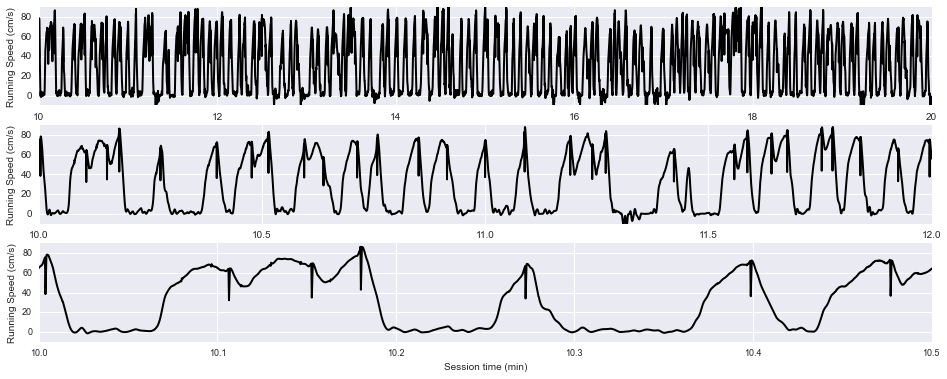

In [152]:
fig,ax = plt.subplots(3,1,sharey=True)
fig.set_size_inches(16,6)
pf.plotRunningSpeed(t,smooth(arclength,20),ax=ax[0])
pf.plotRunningSpeed(t,smooth(arclength,20),ax=ax[1])
pf.plotRunningSpeed(t,smooth(arclength,20),ax=ax[2])

ax[0].set_xlim(10,20)
ax[1].set_xlim(10,12)
ax[2].set_xlim(10,10.5)

ax[0].set_ylim(-10,90)